# Import librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JeremySCHNEIDER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Custom fonctions

In [2]:
def preprocessBoW(data, max_features=1500, min_df=5, max_df=0.7):
    '''This function preprocess data
    And then transform it into a TF-IDF vector'''
    
    vectorizer = CountVectorizer(max_features,min_df, max_df)
    documents = []
    
    for sen in range(len(data)):
        #first we only kept standart letters
        document = re.sub(r'\W', ' ', str(data[sen]))
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        document = re.sub(r'^b\s+', '', document)
        #Then we lower everything
        document = document.lower()
        #finaly we Tokenzie and remove stop words
        tokens = word_tokenize(document)
        filtered = [word for word in tokens if word not in stop_words]
        documents.append(" ".join(filtered))
        
    X = vectorizer.fit_transform(documents).toarray()
    tfidconverter = TfidfTransformer()
    X = tfidconverter.fit_transform(X).toarray()
    return X

def Fold8(data, text, target):
    '''This function is used for cross validation of our training data'''
    liste_score = []
    data["fold"] = data.index%8
    for i in range(8):
        print("This is the fold n° : {} \n".format(str(i)))
        
        X = preprocessBoW(data[text])
        X_train = X[data["fold"] != i]
        X_test = X[data["fold"] == i]

        # création des targets
        y_train = data[target].loc[data["fold"] != i]
        y_train = y_train.reset_index(drop=True)
        y_test = data[target].loc[data["fold"] == i]
        y_test = y_test.reset_index(drop=True)

        #entrainement
        classifier = RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 5, n_jobs = -1)
        classifier.fit(X_train, y_train)

        #prédiction
        y_pred = classifier.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Accuracy : " + str(accuracy_score(y_test, y_pred)))
        liste_score.append(accuracy_score(y_test, y_pred))
        print("---")
    mean_score = round(sum(liste_score)/float(len(liste_score)),2)
    print("The mean score is: {}".format(str(mean_score)))

# Import data

In [3]:
stop_words = set(stopwords.words('english'))
df_train =pd.read_csv("data/disasterTweeter/train.csv", sep=",")

In [4]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# We'll only use text and target, so I drop the rest
df_train = df_train.drop(["id", "keyword", "location"], axis=1)

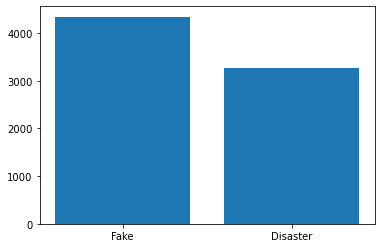

There are 4342 fake disasters and 3271 real disasters


In [6]:
# Quick view of the repartition fo the target classes
height = [len(df_train.loc[df_train["target"] == 0]), len(df_train.loc[df_train["target"] == 1])]
label = ('Fake', 'Disaster')
y_pos = [0,1]
plt.bar(y_pos, height)
plt.xticks(y_pos, label)
plt.show()
print("There are {} fake disasters and {} real disasters".format(height[0], height[1]))

# Testing

In [7]:
Fold8(df_train, "text", "target")

This is the fold n° : 0 



C:\Users\JeremySCHNEIDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=1500, encoding=5, decode_error=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[548   0]
 [364  40]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       548
           1       1.00      0.10      0.18       404

    accuracy                           0.62       952
   macro avg       0.80      0.55      0.47       952
weighted avg       0.77      0.62      0.51       952

Accuracy : 0.6176470588235294
---
This is the fold n° : 1 



C:\Users\JeremySCHNEIDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=1500, encoding=5, decode_error=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[543   0]
 [391  18]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       543
           1       1.00      0.04      0.08       409

    accuracy                           0.59       952
   macro avg       0.79      0.52      0.41       952
weighted avg       0.76      0.59      0.46       952

Accuracy : 0.5892857142857143
---
This is the fold n° : 2 



C:\Users\JeremySCHNEIDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=1500, encoding=5, decode_error=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[581   0]
 [341  30]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       581
           1       1.00      0.08      0.15       371

    accuracy                           0.64       952
   macro avg       0.82      0.54      0.46       952
weighted avg       0.77      0.64      0.53       952

Accuracy : 0.6418067226890757
---
This is the fold n° : 3 



C:\Users\JeremySCHNEIDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=1500, encoding=5, decode_error=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[530   0]
 [396  26]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       530
           1       1.00      0.06      0.12       422

    accuracy                           0.58       952
   macro avg       0.79      0.53      0.42       952
weighted avg       0.76      0.58      0.46       952

Accuracy : 0.5840336134453782
---
This is the fold n° : 4 



C:\Users\JeremySCHNEIDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=1500, encoding=5, decode_error=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[518   0]
 [406  28]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       518
           1       1.00      0.06      0.12       434

    accuracy                           0.57       952
   macro avg       0.78      0.53      0.42       952
weighted avg       0.76      0.57      0.45       952

Accuracy : 0.5735294117647058
---
This is the fold n° : 5 



C:\Users\JeremySCHNEIDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=1500, encoding=5, decode_error=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[535   0]
 [388  28]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       535
           1       1.00      0.07      0.13       416

    accuracy                           0.59       951
   macro avg       0.79      0.53      0.43       951
weighted avg       0.76      0.59      0.47       951

Accuracy : 0.5920084121976866
---
This is the fold n° : 6 



C:\Users\JeremySCHNEIDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=1500, encoding=5, decode_error=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[549   0]
 [374  28]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.75       549
           1       1.00      0.07      0.13       402

    accuracy                           0.61       951
   macro avg       0.80      0.53      0.44       951
weighted avg       0.77      0.61      0.49       951

Accuracy : 0.6067297581493165
---
This is the fold n° : 7 



C:\Users\JeremySCHNEIDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=1500, encoding=5, decode_error=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[538   0]
 [383  30]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       538
           1       1.00      0.07      0.14       413

    accuracy                           0.60       951
   macro avg       0.79      0.54      0.44       951
weighted avg       0.76      0.60      0.48       951

Accuracy : 0.5972660357518401
---
The mean score is: 0.6


# Conclusion

This method give an overall 60% of precision which is low.